In [1]:
from Utils.Utils_SUES import CustomDataset, get_transforms, DrawImage
import torch

In [2]:
test_dir = "../Data/SUES_CRACK/test"
train_dir = "../Data/SUES_CRACK/train"

520 80


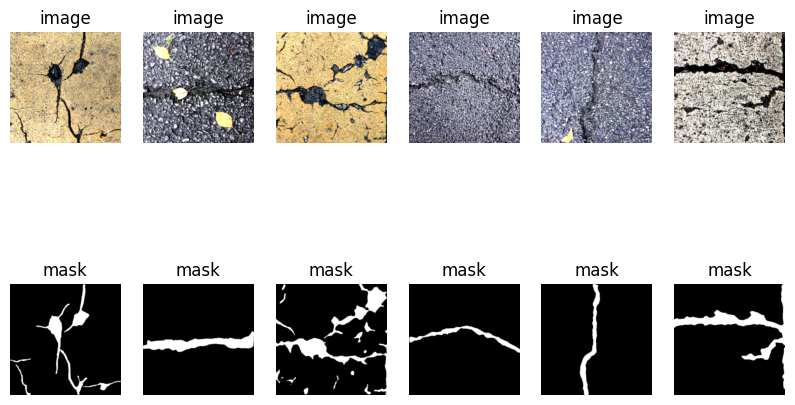

In [3]:
testset = CustomDataset(test_dir, transform=get_transforms())
trainset = CustomDataset(train_dir, transform=get_transforms())
print(trainset.__len__(), testset.__len__())
drawImage = DrawImage()
drawImage.test_loaderImage(trainset)

In [4]:
from torch.utils.data import TensorDataset

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=2, shuffle=True)

In [6]:
val_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=2, shuffle=True)

In [7]:
from Utils import Nxtrain

In [8]:
from Models import V2net

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]             256
       BatchNorm2d-2         [-1, 64, 224, 224]             128
            Conv2d-3         [-1, 64, 224, 224]           1,792
       BatchNorm2d-4         [-1, 64, 224, 224]             128
 AdaptiveAvgPool2d-5              [-1, 3, 1, 1]               0
            Conv2d-6             [-1, 64, 1, 1]             256
           Sigmoid-7             [-1, 64, 1, 1]               0
              SiLU-8         [-1, 64, 224, 224]               0
              MCFA-9         [-1, 64, 224, 224]               0
        MaxPool2d-10         [-1, 64, 112, 112]               0
           Conv2d-11          [-1, 6, 112, 112]           3,462
        GroupNorm-12          [-1, 6, 112, 112]              12
             Tanh-13          [-1, 6, 112, 112]               0
           Conv2d-14        [-1, 128, 1

In [9]:
net = V2net.V2net(3, 1)  

训练开始 cuda:0


D:\CV\pj\QLH\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epochs:   0%|          | 0/320 [02:05<?, ?it/s, accuracy=0, dice=0, iou=0, precision=0, recall=0]


KeyboardInterrupt: 

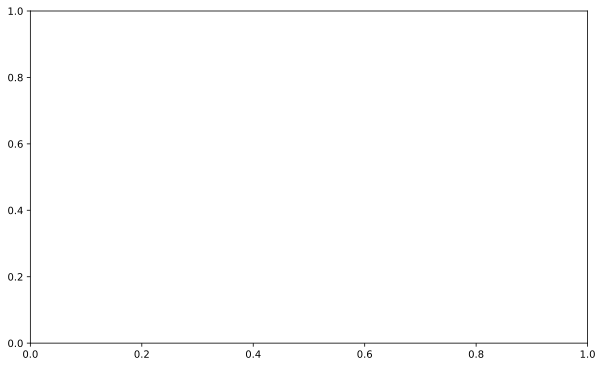

In [10]:
Nxtrain.train(net, train_loader, val_loader, 0.001, 320, "V2net_SUES_0.001_320")